<a href="https://colab.research.google.com/github/Vedant0402/EDA_reusable_code/blob/main/EDA(Day-4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Day-4 Outlier Detection & Managing them

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# Numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols].describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


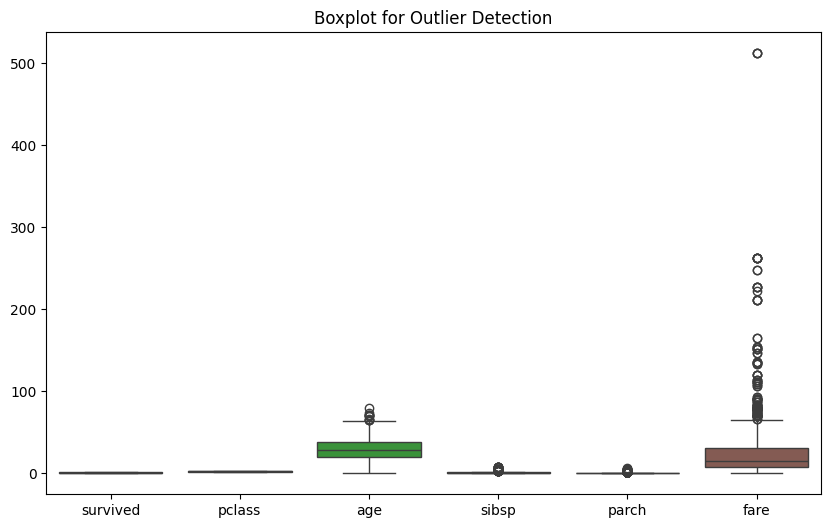

In [4]:
# Visualize
plt.figure(figsize=(10,6))
sns.boxplot(data=df[num_cols])
plt.title("Boxplot for Outlier Detection")
plt.show()

####Observation--> Outliers present in age, sibsp, parch, fare

In [5]:
# IQR - Inter Quartile Method
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR)))
outlier_counts = outliers.sum().sort_values(ascending=False)
outlier_counts

,0
parch,213
fare,116
sibsp,46
age,11
pclass,0
survived,0


####Observation--> No. of outliers present in each column

# Treating Outliers

In [6]:
# Remove them
df_clean = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
# Cap them (Winsorization)

#for col in num_cols:
    #lower, upper = Q1[col] - 1.5 * IQR[col], Q3[col] + 1.5 * IQR[col]
    #df[col] = df[col].clip(lower, upper)

In [ ]:
#Transform (log or sqrt) -- to reduce skewness

#df['fare_log'] = np.log1p(df['fare'])